In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# 1.Data Collection


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
df=pd.read_csv('/content/drive/MyDrive/linear regression (ML)/house_price_dataset1.csv')
df

,House ID,Size (sq ft),Bedrooms,Bathrooms,Location Rating,Age (years),Price ($)
0,1,2060,4,2,7,17,356056
1,2,2494,4,1,8,8,410443
2,3,2330,2,1,10,1,387000
3,4,2295,4,1,5,9,399625
4,5,2838,2,3,8,11,455362
...,...,...,...,...,...,...,...
95,96,2695,3,3,6,1,445354
96,97,2362,2,1,7,15,393211
97,98,2722,2,1,6,2,446490
98,99,3840,2,3,6,22,588357


# 2.Data Preprocessing and Data cleaning


In [15]:
df.isnull().sum()

,0
House ID,0
Size (sq ft),0
Bedrooms,0
Bathrooms,0
Location Rating,0
Age (years),0
Price ($),0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   House ID         100 non-null    int64
 1   Size (sq ft)     100 non-null    int64
 2   Bedrooms         100 non-null    int64
 3   Bathrooms        100 non-null    int64
 4   Location Rating  100 non-null    int64
 5   Age (years)      100 non-null    int64
 6   Price ($)        100 non-null    int64
dtypes: int64(7)
memory usage: 5.6 KB


In [18]:
df.describe()

,House ID,Size (sq ft),Bedrooms,Bathrooms,Location Rating,Age (years),Price ($)
count,100.000000,100.00000,100.000000,100.0000,100.00000,100.00000,100.000000
mean,50.500000,2635.75000,3.520000,2.0100,7.62000,16.12000,440705.450000
std,29.011492,797.01399,1.096183,0.8468,1.78535,8.43068,120212.122257
min,1.000000,1221.00000,2.000000,1.0000,5.00000,1.00000,199753.000000
25%,25.750000,1987.00000,2.750000,1.0000,6.00000,9.00000,344120.500000
50%,50.500000,2565.00000,4.000000,2.0000,8.00000,17.00000,422195.000000
75%,75.250000,3346.50000,4.000000,3.0000,9.00000,23.00000,545874.750000
max,100.000000,3977.00000,5.000000,3.0000,10.00000,29.00000,656893.000000


# 3.Data Virtualize

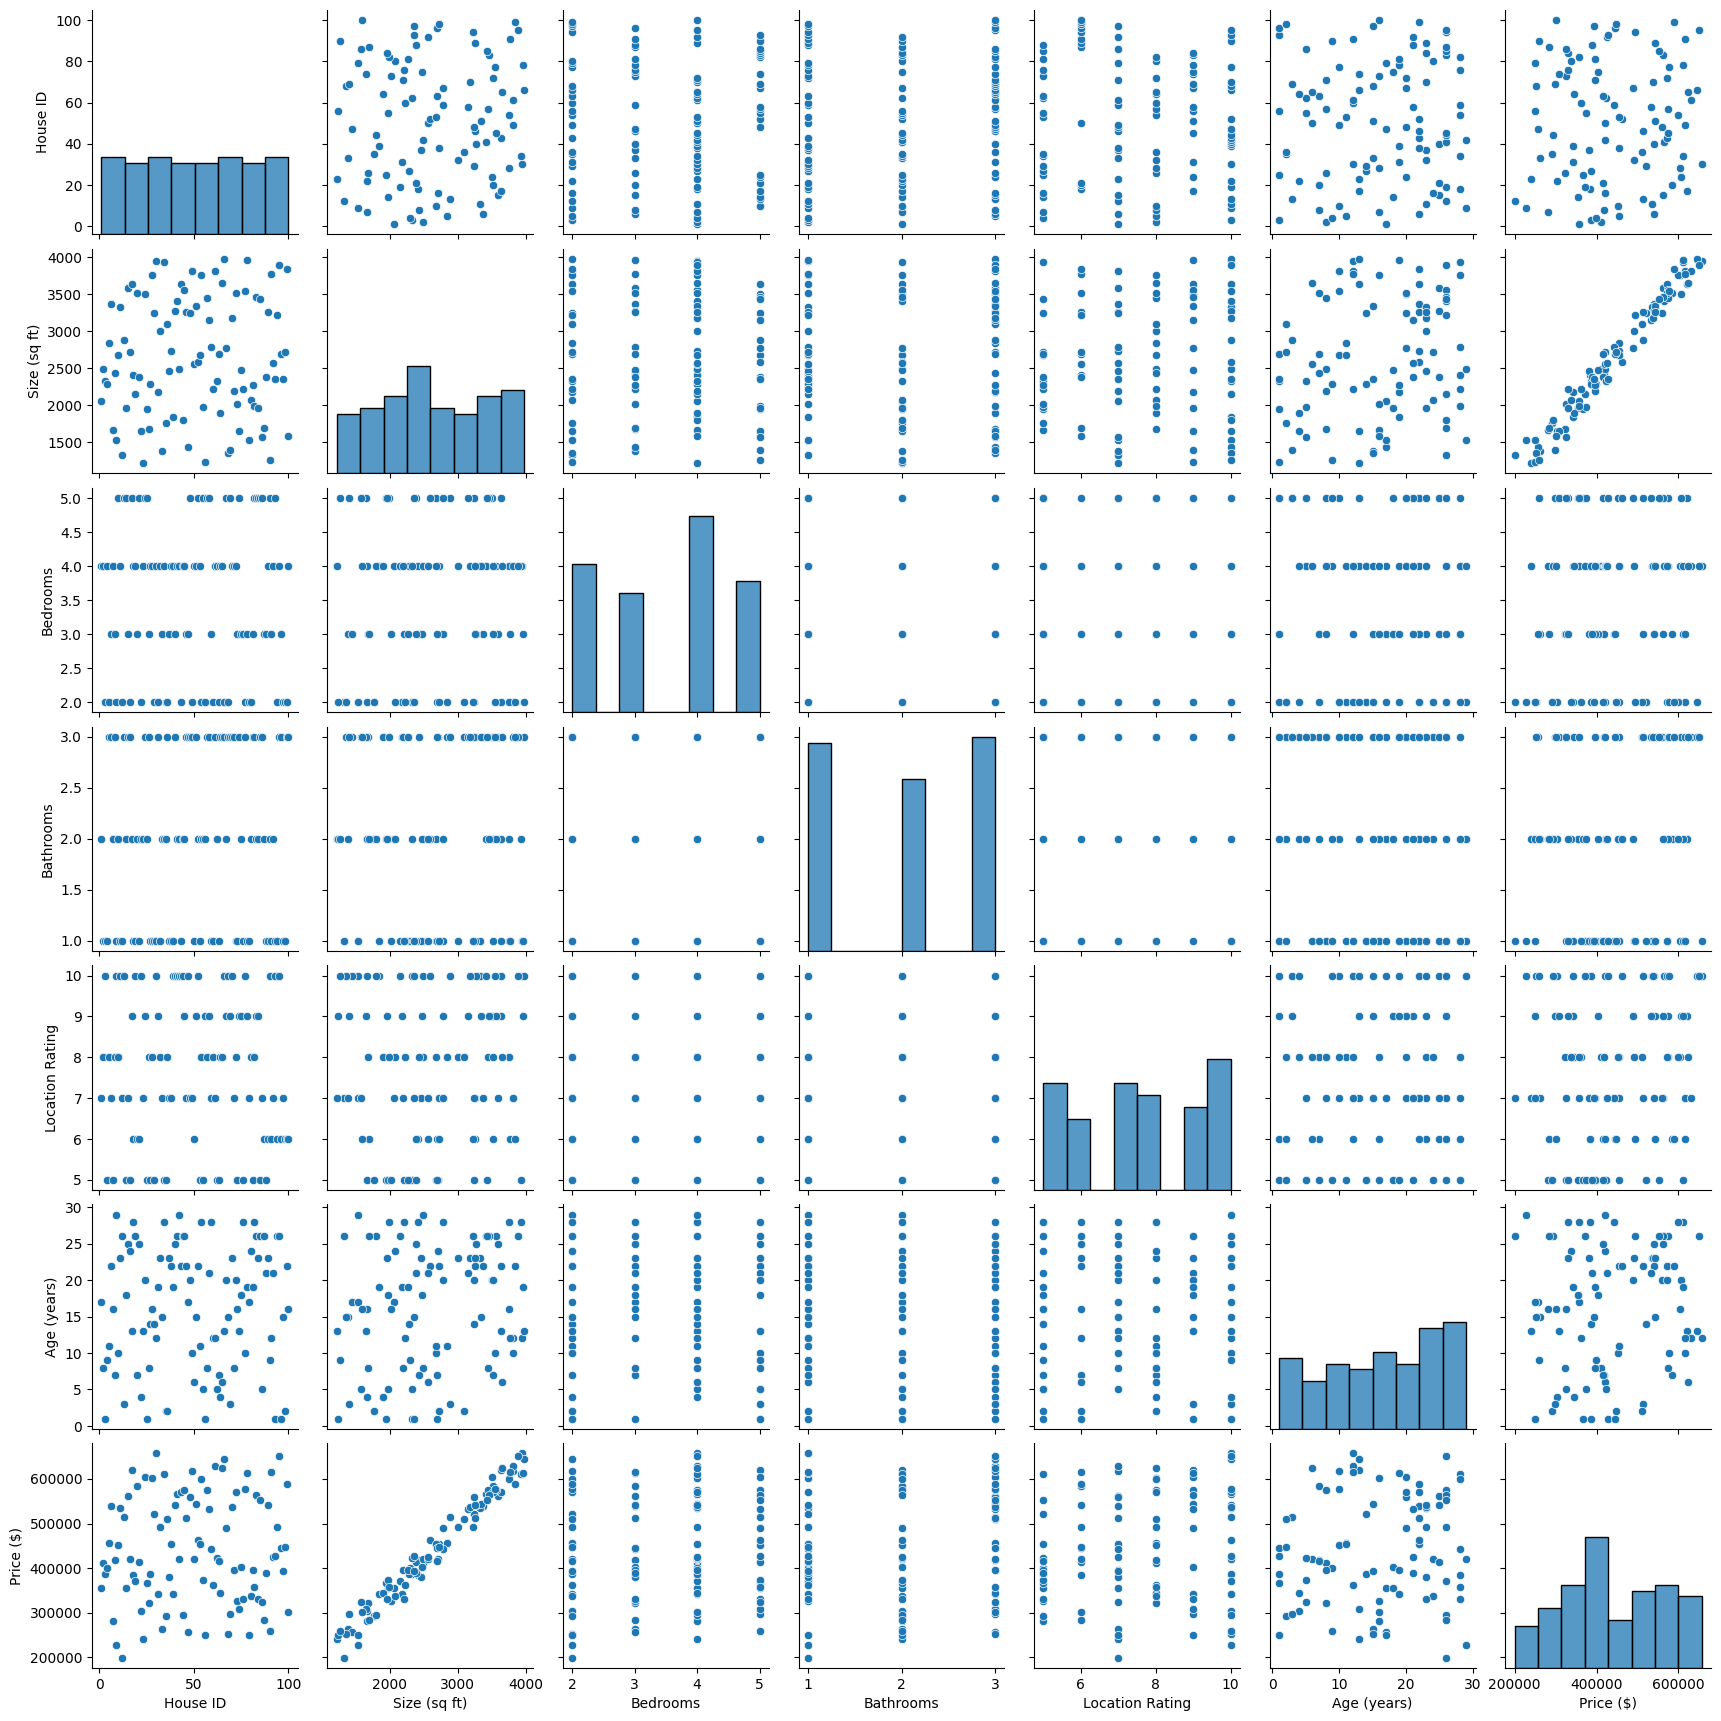

In [70]:
%matplotlib inline
sns.pairplot(df)

# 4.Split the dataset

In [54]:
x=df[['Location Rating','House ID','Size (sq ft)','Bedrooms','Bedrooms','Age (years)']].values
y=df['Price ($)'].values

In [55]:
x.shape,y.shape

((100, 6), (100,))

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [73]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((80, 6), (20, 6), (80,), (20,))

# 5.Train the Model

In [74]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [75]:
print('intercept:',model.intercept_)
print('slope:',model.coef_)

intercept: -98.62106327631045
slope: [ 2766.23436015    85.7675729    150.10149641  5527.00023015
  5527.00023015 -1155.67881647]


# 6.Model train Prediction

In [90]:
model.predict([[10,2300,3,2,8,10]])

array([268992.65883399])

In [91]:
2766.23436015*10+85.7675729*2300+150.10149641*3+5527.00023015*2+5527.00023015*8+-1155.67881647*10

269091.2798975301

In [76]:
y_train_pred=model.predict(x_train)

In [78]:
y_train_pred.shape

(80,)

# 7.Virtualize the train model

Text(0.5, 1.0, 'house price prediction')

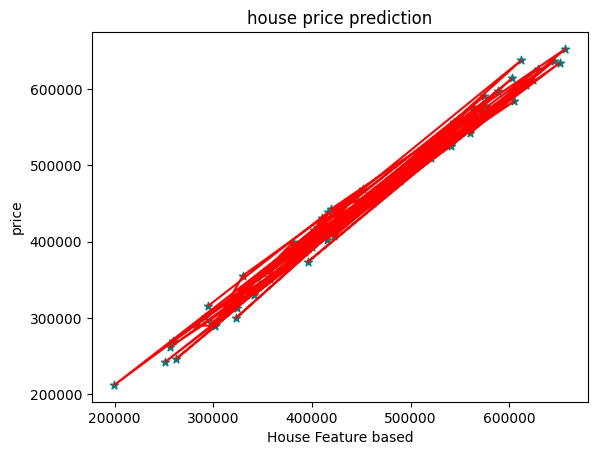

In [84]:
plt.scatter(y_train,y_train_pred,color='teal',marker='*')
plt.plot(y_train,y_train_pred,color='red')
plt.xlabel('House Feature based')
plt.ylabel('price')
plt.title('house price prediction')

# 8.evaluate the train model


In [92]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [93]:
MAE=mean_absolute_error(y_train,y_train_pred)
print("mean absolute error:",MAE)

MSE=mean_squared_error(y_train,y_train_pred)
print("mean squared error:",MSE)

RMSE=np.sqrt(MSE)
print("root mean squared error:",RMSE)
r2_score=r2_score(y_train,y_train_pred)
print("r2_score:",r2_score)


mean absolute error: 9779.530546318381
mean squared error: 138086633.72516894
root mean squared error: 11751.026922153185
r2_score: 0.9897699470674394


# 9.test the model


In [94]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_test,y_test)

LinearRegression()

In [97]:
print('intercept:',model.intercept_)
print('slope:',model.coef_)

intercept: 11412.779459210404
slope: [ 1364.6840417    -37.19339148   151.71222137  5728.68061457
  5728.68061457 -1376.5061605 ]


# 10.model test prediction


In [98]:
model.predict([[10,2300,3,2,8,10]])

array([-16508.29933054])

In [99]:
y_test_pred=model.predict(x_test)

In [100]:
y_test_pred.shape

(20,)

#11. virtaualize the test model

Text(0.5, 1.0, 'house price prediction')

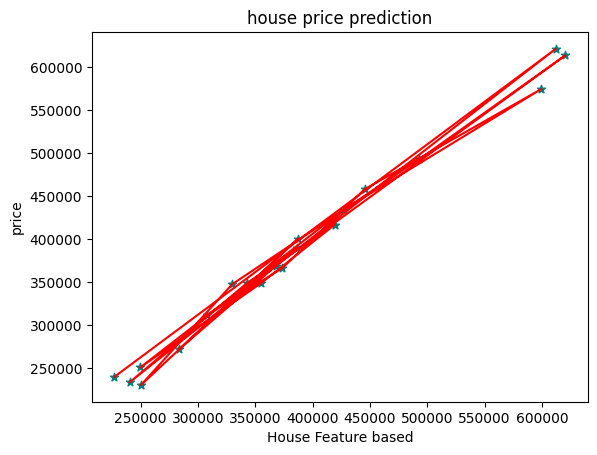

In [101]:
plt.scatter(y_test,y_test_pred,color='teal',marker='*')
plt.plot(y_test,y_test_pred,color='red')
plt.xlabel('House Feature based')
plt.ylabel('price')
plt.title('house price prediction')

# 12.evaluate the test model

In [102]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [103]:
MAE=mean_absolute_error(y_test,y_test_pred)
print("mean absolute error:",MAE)

MSE=mean_squared_error(y_test,y_test_pred)
print("mean squared error:",MSE)

RMSE=np.sqrt(MSE)
print("root mean squared error:",RMSE)

r2_score=r2_score(y_test,y_test_pred)
print("r2_score:",r2_score)

mean absolute error: 8708.401889986051
mean squared error: 117829638.90162456
root mean squared error: 10854.93615373322
r2_score: 0.9914552040589728
